# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# **Task 1: Data Validation & Cleaning**

In [161]:
# Importing required libraries and getting overview to start cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as sty
import plotly.express as px
import seaborn as sns
df = pd.read_csv('product_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Prior to cleaning this dataset, there were 15,000 rows & 8 columns.

In [162]:
# Shape before cleaning
df.shape

(15000, 8)

In [163]:
# Revenue column is the only one missing values
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [164]:
# Viewing head of Table
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


There were 1,074 missing values in the Revenue column. I dropped the values in the next entry. This changes the shape of the table to 13,926 rows and 8 columns.

In [165]:
# Removing missing values from columns
df.dropna(inplace=True)
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [166]:
# Checking Table Values / Need to fix "Sales_Method" as there are some dupes
print(df['sales_method'].unique())
print(df['state'].unique())
print(df['week'].unique())

['Email + Call' 'Call' 'Email' 'em + call' 'email']
['Kansas' 'Wisconsin' 'Illinois' 'Mississippi' 'Georgia' 'Oklahoma'
 'Massachusetts' 'Missouri' 'Texas' 'New York' 'Maryland' 'California'
 'Tennessee' 'North Dakota' 'Florida' 'Michigan' 'North Carolina'
 'Pennsylvania' 'Indiana' 'Hawaii' 'Colorado' 'Louisiana' 'Virginia'
 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire' 'Ohio' 'New Jersey'
 'Connecticut' 'Iowa' 'Montana' 'Washington' 'Arizona' 'Kentucky'
 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota' 'South Dakota' 'Maine'
 'Utah' 'West Virginia' 'Vermont' 'New Mexico' 'Rhode Island' 'Nevada'
 'Delaware' 'Idaho' 'Wyoming']
[6 5 3 4 1 2]


In [167]:
# Shape after cleaning & dropping missing values in Revenue column
df.shape

(13926, 8)

In [168]:
# When printing unique values in the sales_method column -> 
# there are some duplicates i.e 'em + call' & 'email' need to be fixed.

df.loc[df.sales_method == 'em + call', 'sales_method'] = 'Email + Call'
df.loc[df.sales_method == 'email', 'sales_method'] = 'Email'
print(f'\nEnsuring that there are only 3 options in the sales_methods column after amending: {df.sales_method.unique()}')


Ensuring that there are only 3 options in the sales_methods column after amending: ['Email + Call' 'Call' 'Email']


_I have realigned those with 'em + call' to the 'Email + Call' option and those with 'email' to 'Email' respectively._

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [170]:
# Checking the values in the years as customer column
df['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: years_as_customer, dtype: int64

In [171]:
# Checking for customers that have 'years_as_customer' longer than 39 Years
df[df['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [172]:
# Dropping rows that are outliers i.e longer than 39 'years_as_customer'
df.drop(df[df['years_as_customer'] > 39].index, axis=0, inplace=True)

# Checking to see that they've been removed
df[df['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [173]:
# Verifying the outliers in 'years_as_customer' have been removed
df['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
Name: years_as_customer, dtype: int64

In [174]:
# Checking the breakdown of values across State column
df['state'].value_counts().sort_index()

Alabama            202
Alaska              35
Arizona            295
Arkansas           118
California        1737
Colorado           212
Connecticut        167
Delaware            27
Florida            826
Georgia            460
Hawaii              67
Idaho               59
Illinois           576
Indiana            327
Iowa               154
Kansas             129
Kentucky           202
Louisiana          213
Maine               60
Maryland           245
Massachusetts      270
Michigan           466
Minnesota          228
Mississippi        133
Missouri           286
Montana             43
Nebraska            86
Nevada              97
New Hampshire       48
New Jersey         402
New Mexico          79
New York           899
North Carolina     430
North Dakota        25
Ohio               520
Oklahoma           184
Oregon             214
Pennsylvania       553
Rhode Island        41
South Carolina     213
South Dakota        38
Tennessee          308
Texas             1109
Utah       

In [175]:
# Number of States included
df.state.nunique()

50

In [176]:
# View of Dataset before moving to Analysis
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [177]:
# Final Shape
df.shape

(13924, 8)

## **Summary of Data Validation:**

Describe validation and cleaning steps for every column in the data within all 15,000 rows and 8 columns within the dataset:

- **Week**:

The data covers sales from week 1 to week 6, indicating the period immediately following the product launch. This timeframe is crucial for understanding the initial market response. This column is accurate and does not need cleaning.

- **Sales Method**:

Consolidated 'email', 'Email', 'em + call', 'Email + Call', and 'Call' into standardized categories: 'Email', 'Email + Call', and 'Call'. This will provide a clearer view of the preferred sales approaches and their outcomes.

- **Customer ID**:

With 15,000 unique customer IDs, each transaction can be tracked to an individual customer, which is essential for personalized sales analysis. This column is accurate and does not need cleaning.

- **Nb_sold**:

The number of products sold per transaction ranges from 7 to 16. This specific range indicates that the company deals with moderate volume sales per customer. This column is accurate and does not need cleaning.

- **Revenue**:

Addressed the 1,074 missing values with results in 13,924 rows and 8 columns to ensure the analysis reflects the true financial impact of the sales strategies. Only columns that had missing values.

- **Years as Customer**:

Dropped the two rows, 47 & 63 after 3 since Pens and Printers was founded in 1984.

- **Nb_site_visits**:

Checked for top 5 highest product with highest visits sold to better analyze why 1557 is the highest number of visits. This column is accurate and does not need cleaning.

- **State**:

Verified that there are 50 unique states. This column is accurate and does not need cleaning.

# **Task 2: Exploratory Analysis**

## **1. How many customers were there for each approach?**

In [178]:
# Importing Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
# Checking how many customers for each approach
df['sales_method'].value_counts()

Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64

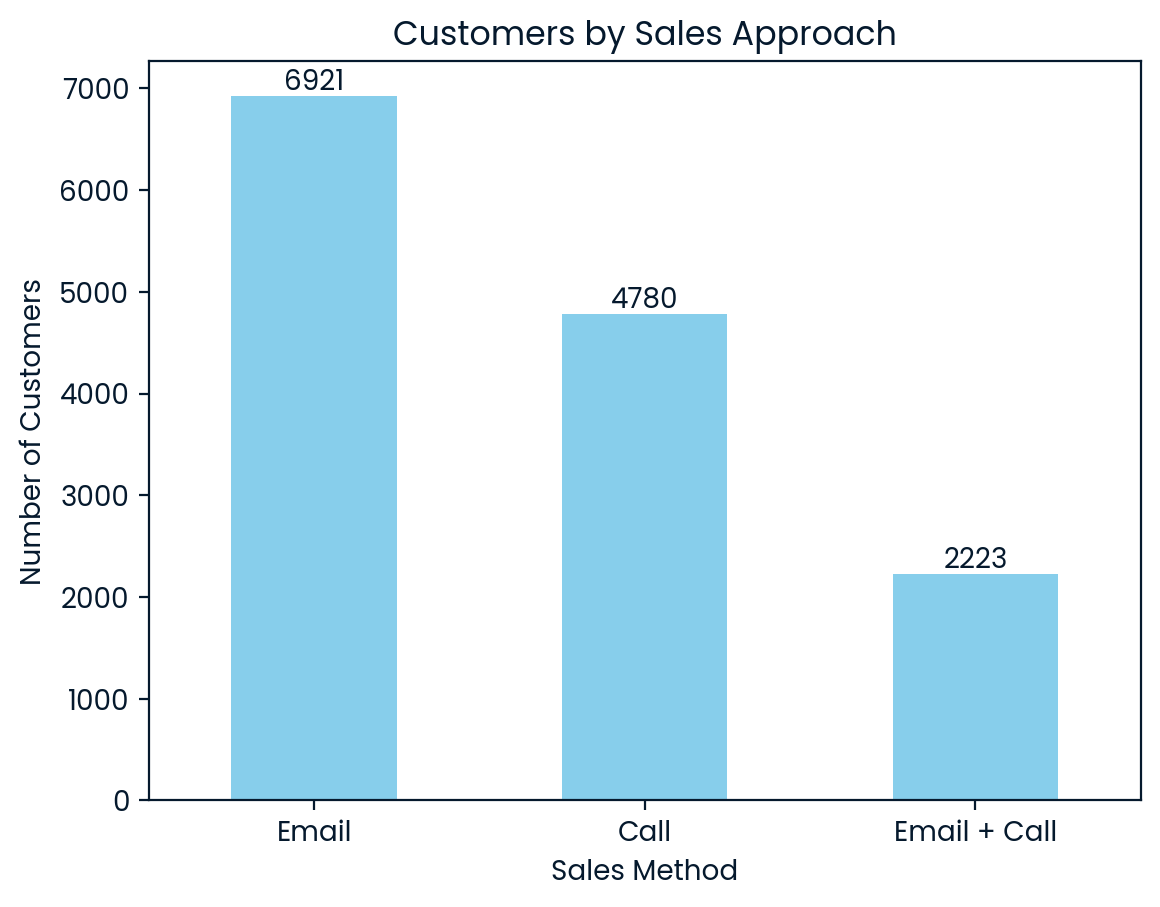

In [180]:
#Plotting number of customers for Each Sales Approach
ax = df.sales_method.value_counts().plot(kind="bar", color='skyblue')
ax.set_title("Customers by Sales Approach")
ax.set_xlabel("Sales Method")
ax.set_ylabel("Number of Customers")
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=10)
plt.xticks(rotation=0)
plt.show()

The bar graph is titled "Customer Count by Sales Approach" and displays the number of customers for three different sales methods. The sales methods are "Email," "Call," and "Email + Call." The number of customers for each method is shown above the corresponding bars on the graph.

"Email" is the most effective sales approach with 6,921 customers. "Call" comes in second with 4,780 customers. The combined approach "Email + Call" has the least, with 2,223 customers.

## **2. What does the spread of the revenue look like overall? And for each method?**

In [181]:
# Importing Libraries and Defining Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(data, x_arg, y_arg, title, x_label, y_label):
    sns.boxplot(data=data, x=x_arg, y=y_arg)
    
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
    sns.despine()
    plt.show()

In [182]:
# Defining Histogram

def hist_plot(data, x_arg, title, x_label, y_label, bin_size):
    
    sns.histplot(data=data, x=x_arg, bins=bin_size)
    
    # set plot title and axis labels
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
  
    sns.despine()
    plt.show()

In [183]:
# Defining Univariate Plot function

def plot(kind, data, x_arg, y_arg, hue, title, x_label, y_label, color, marker_):
    
    if kind == sns.lineplot:
        kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color, marker = marker_)
        plt.title(title, size=12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')
        
    elif kind == sns.barplot:
        ax = kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color)
        plt.title(title, size=12, weight='bold')
        plt.xlabel(x_label, size=10, weight='bold')
        plt.ylabel(y_label, size=10, weight='bold')
        for p in ax.patches:
            ax.annotate('{:.3f}%'.format((p.get_height()/data['revenue'].sum() * 100)), (p.get_x()+0.2, p.get_height()+1),
                        ha = 'left', va='bottom', size='12')
            
    else:
        kind(data=data, x = x_arg, y = y_arg, hue = hue, color = color)
        plt.title(title,size = 12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')

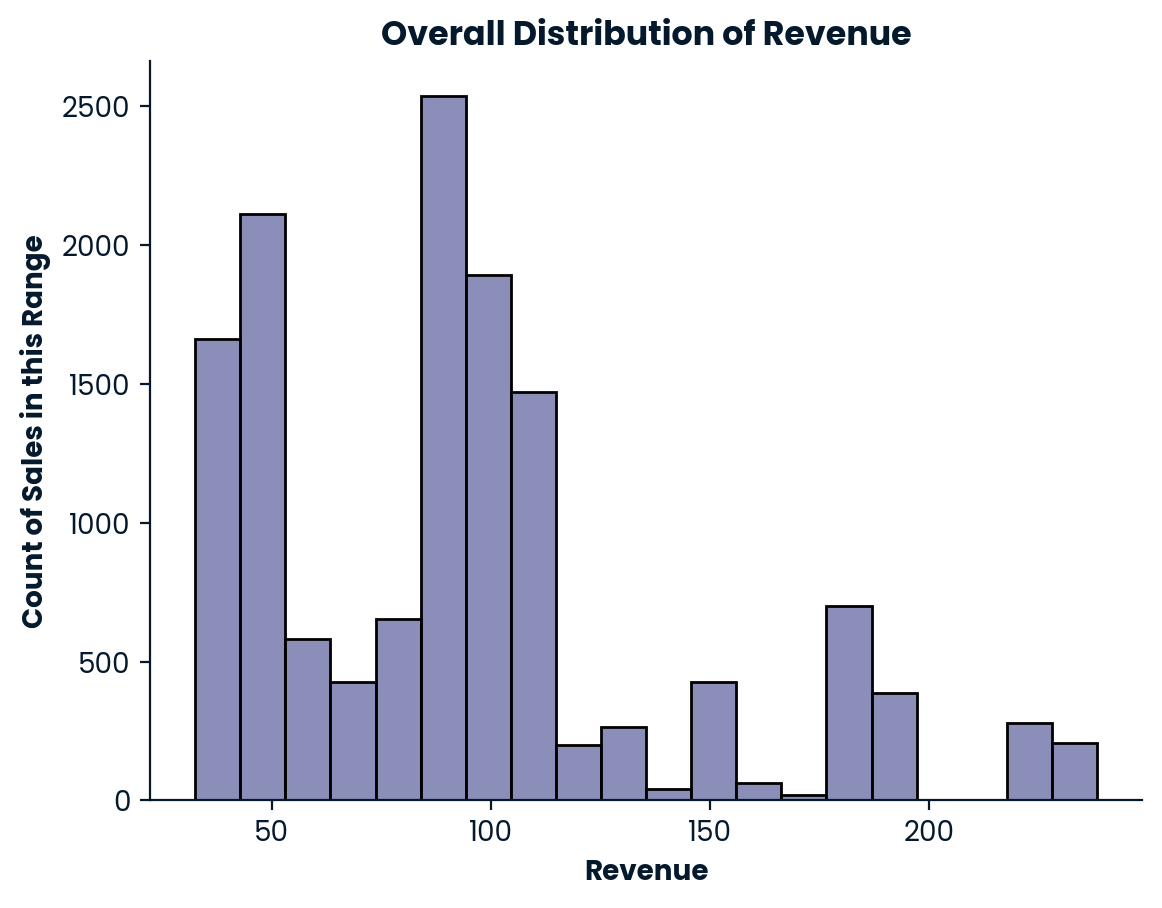

In [184]:
# Creating a Histogram to Visualize the Overall Spread of Revenue
hist_plot(data=df, x_arg='revenue', title = 'Overall Distribution of Revenue', x_label='Revenue', y_label='Count of Sales in this Range', bin_size=20)

Peak Performance: The peak suggests where sales are the highest. We see a lot of action for 50 and 90 items, which might be our sweet spot for pricing or the most common type of product we're selling.

Where the Line Peaks: The highest part of the line (50 or 90) indicates highest sales.

Where the Line is Lower: The data suggests staying away from the valleys such as 70 and anything above 120.

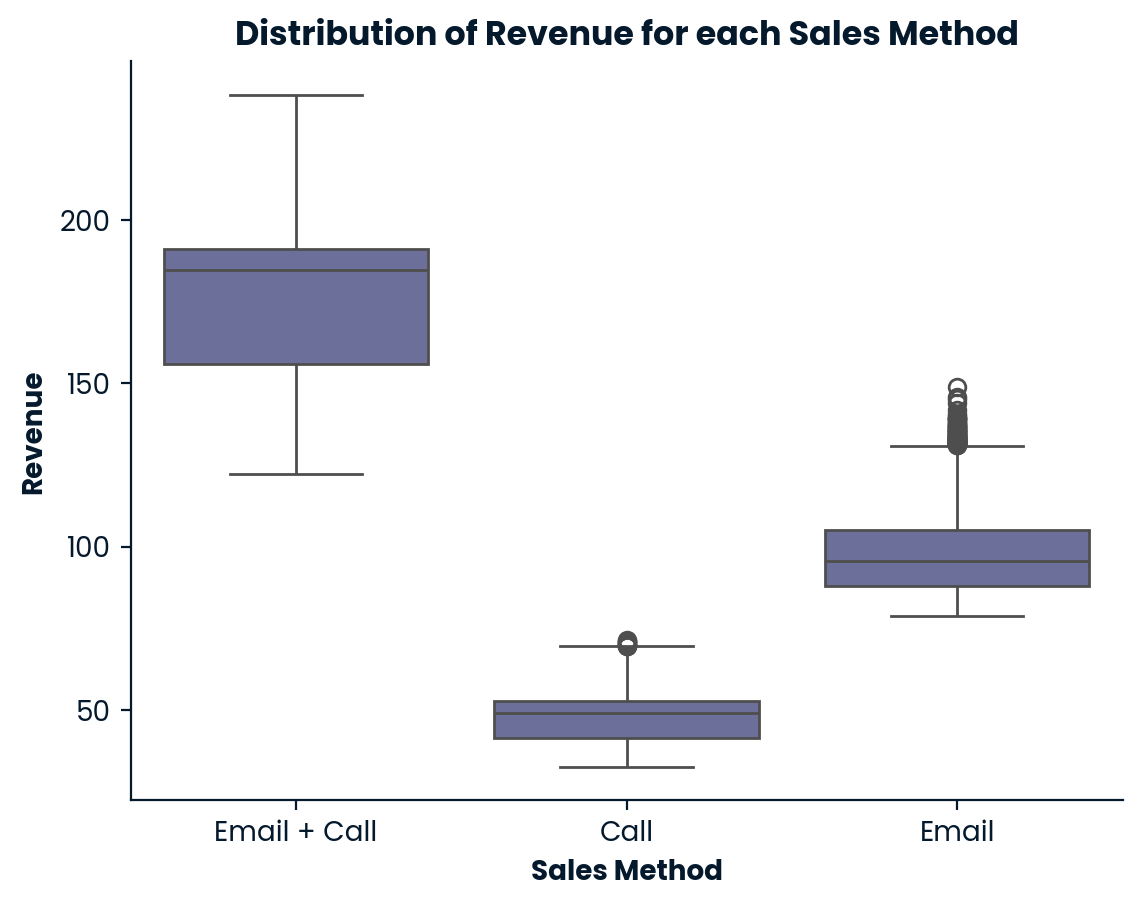

In [185]:
# Creating a Box Plot to Display the Spread of Revenue for Each Sales Method
box_plot(
    data=df, x_arg='sales_method', y_arg='revenue', title='Distribution of Revenue for each Sales Method', x_label='Sales Method', y_label='Revenue')

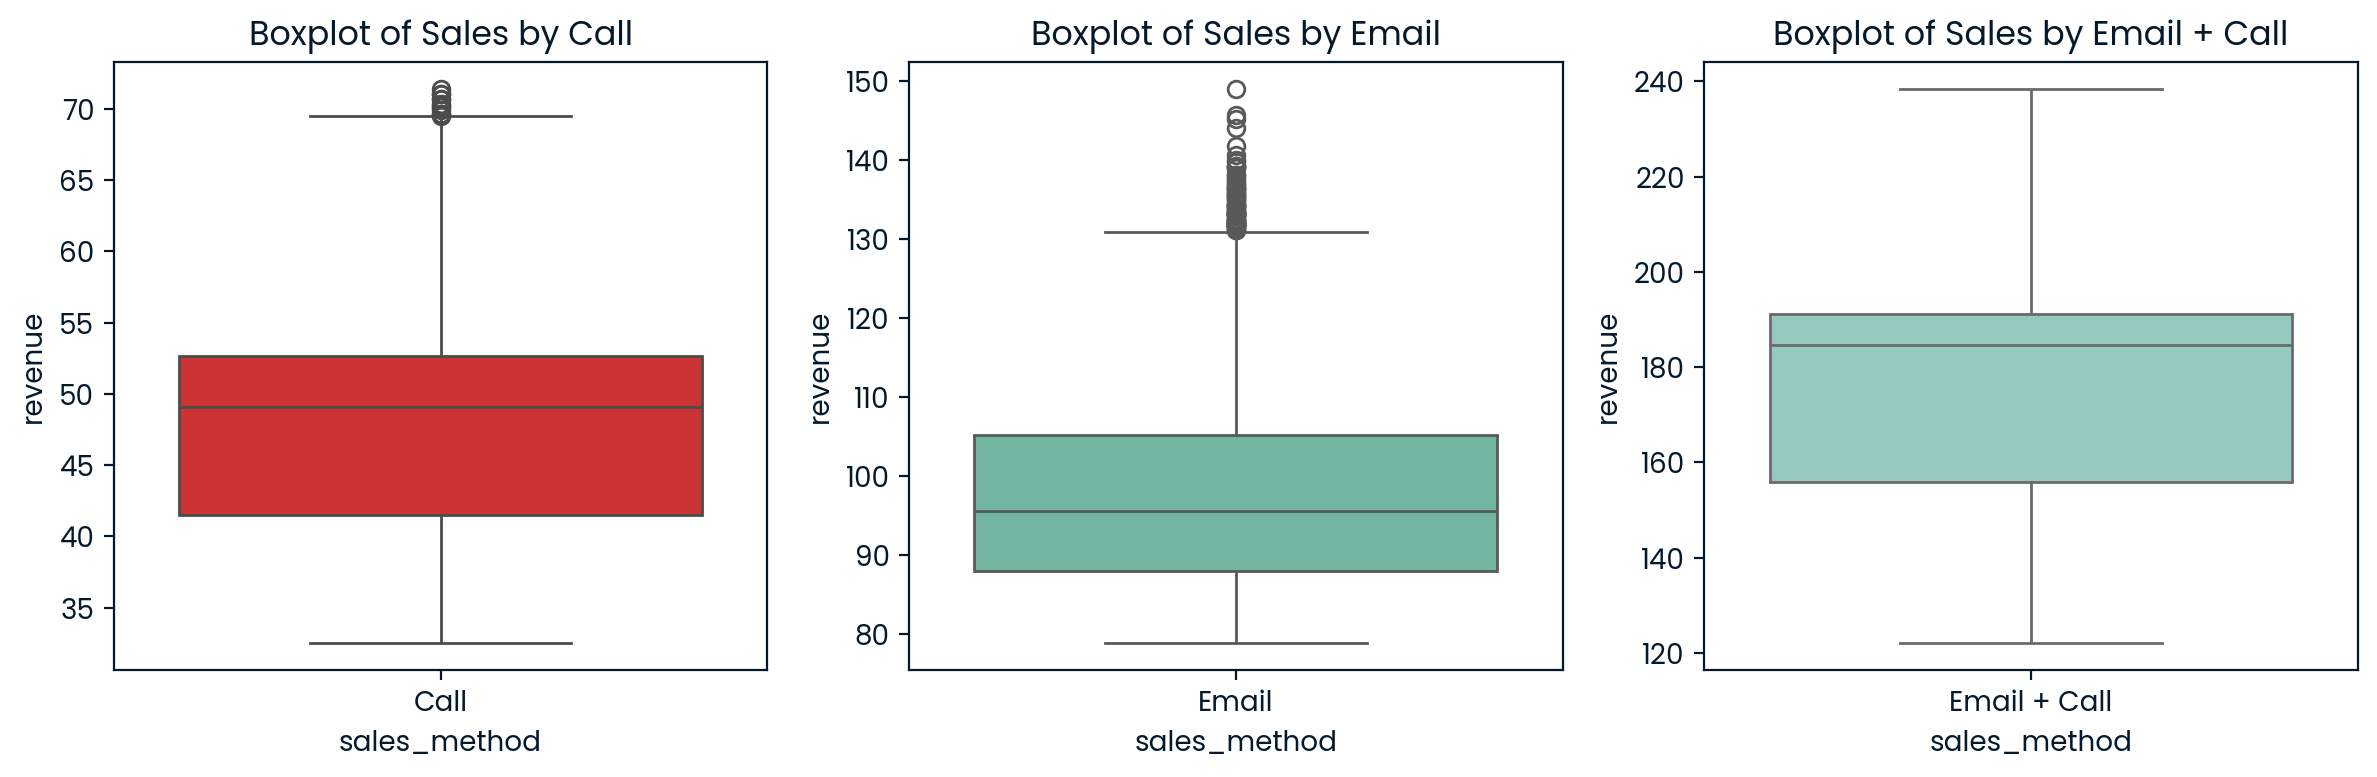

In [186]:
# Boxplots for breakdown of sales by Each Approach
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Call'], ax=axes[0], palette='Set1')
axes[0].set_title('Boxplot of Sales by Call')
sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Email'], ax=axes[1], palette='Set2')
axes[1].set_title('Boxplot of Sales by Email')
sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Email + Call'], ax=axes[2], palette='Set3')
axes[2].set_title('Boxplot of Sales by Email + Call')
fig.tight_layout()
plt.show()

From these side-by-side boxplots, we can tell Calls were the least productive by looking at the range of revenue amounts for the "Call" sales method, only being from ~40-70 which is much lower than either of the other sales methods. Very clearly we can see why Calls were responsible up such a minor percentage of total revenue. The spread of the revenue for each method can be observed above.

From the graph below, we can see that Calls were the lowest revenue generating activity, making up only about 18% of the total revenue produced during this period. Followed by Email + Call, accounting for roughly 31% of revenue, and Email which was responsible for about 53% of revenue. The spread of the revenue is displayed throughout the include charts.

Revenue generated per approach:
sales_method
Call            227513.02
Email + Call    408256.69
Email           672220.61
Name: revenue, dtype: float64


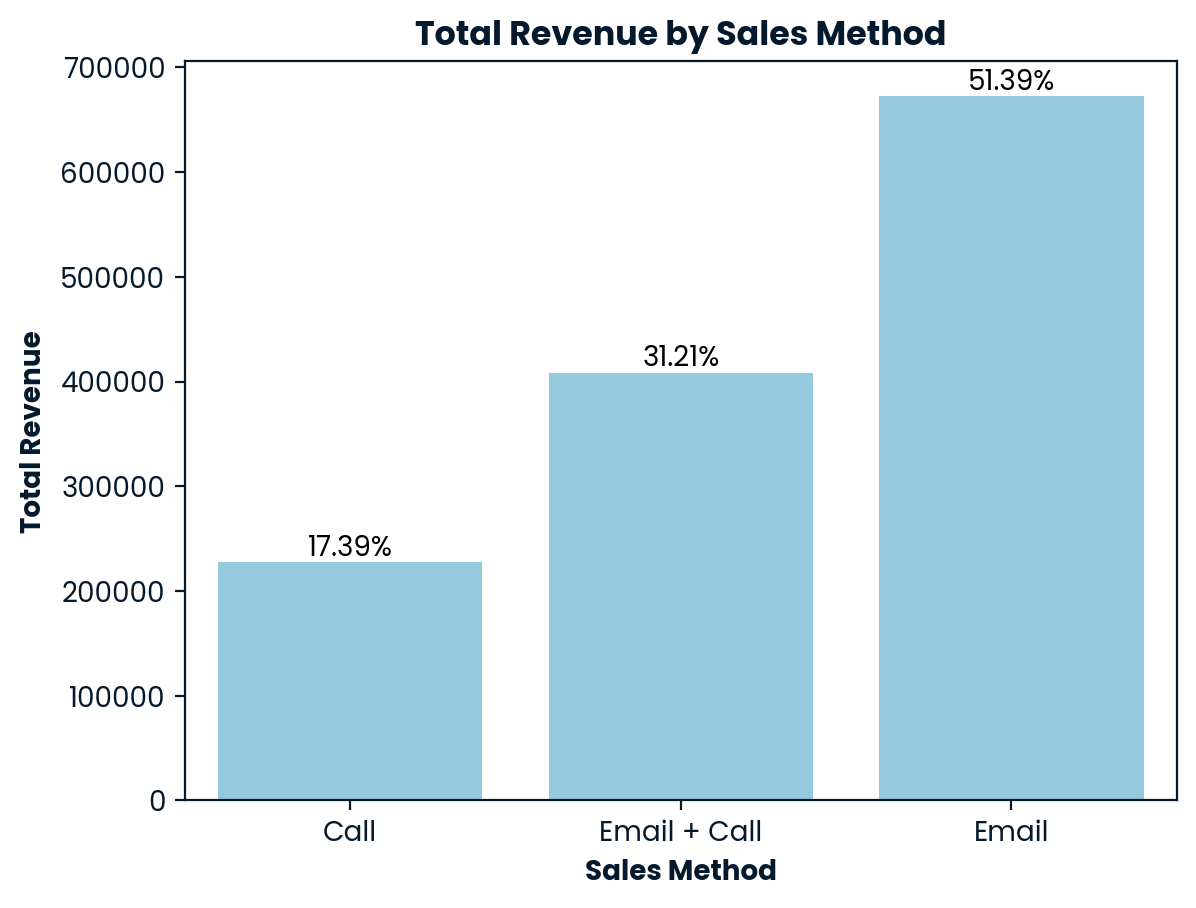

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data and sorting it
group_approach = df.groupby('sales_method')['revenue'].sum().sort_values()
print(f"Revenue generated per approach:\n{group_approach}")

# Converting the group_approach Series into a DataFrame for seaborn compatibility
group_approach_df = group_approach.reset_index()

# Calculate the percentage of each revenue value
group_approach_df['percentage'] = (group_approach_df['revenue'] / group_approach_df['revenue'].sum()) * 100

# Plotting the barplot with the skyblue color
sns.barplot(data=group_approach_df, x='sales_method', y='revenue', color='skyblue')

# Adding labels and title
plt.title('Total Revenue by Sales Method', size=12, weight='bold')
plt.xlabel('Sales Method', size=10, weight='bold')
plt.ylabel('Total Revenue', size=10, weight='bold')

# Add percentages on top of each bar
for index, row in group_approach_df.iterrows():
    plt.text(index, row['revenue'], f"{row['percentage']:.2f}%", color='black', ha="center", va="bottom")

# Display the plot
plt.show()

## **3. Was there any difference in revenue over time for each of the methods?**

In [188]:
# Importing the necessary module for handling dates
from matplotlib.dates import WeekdayLocator

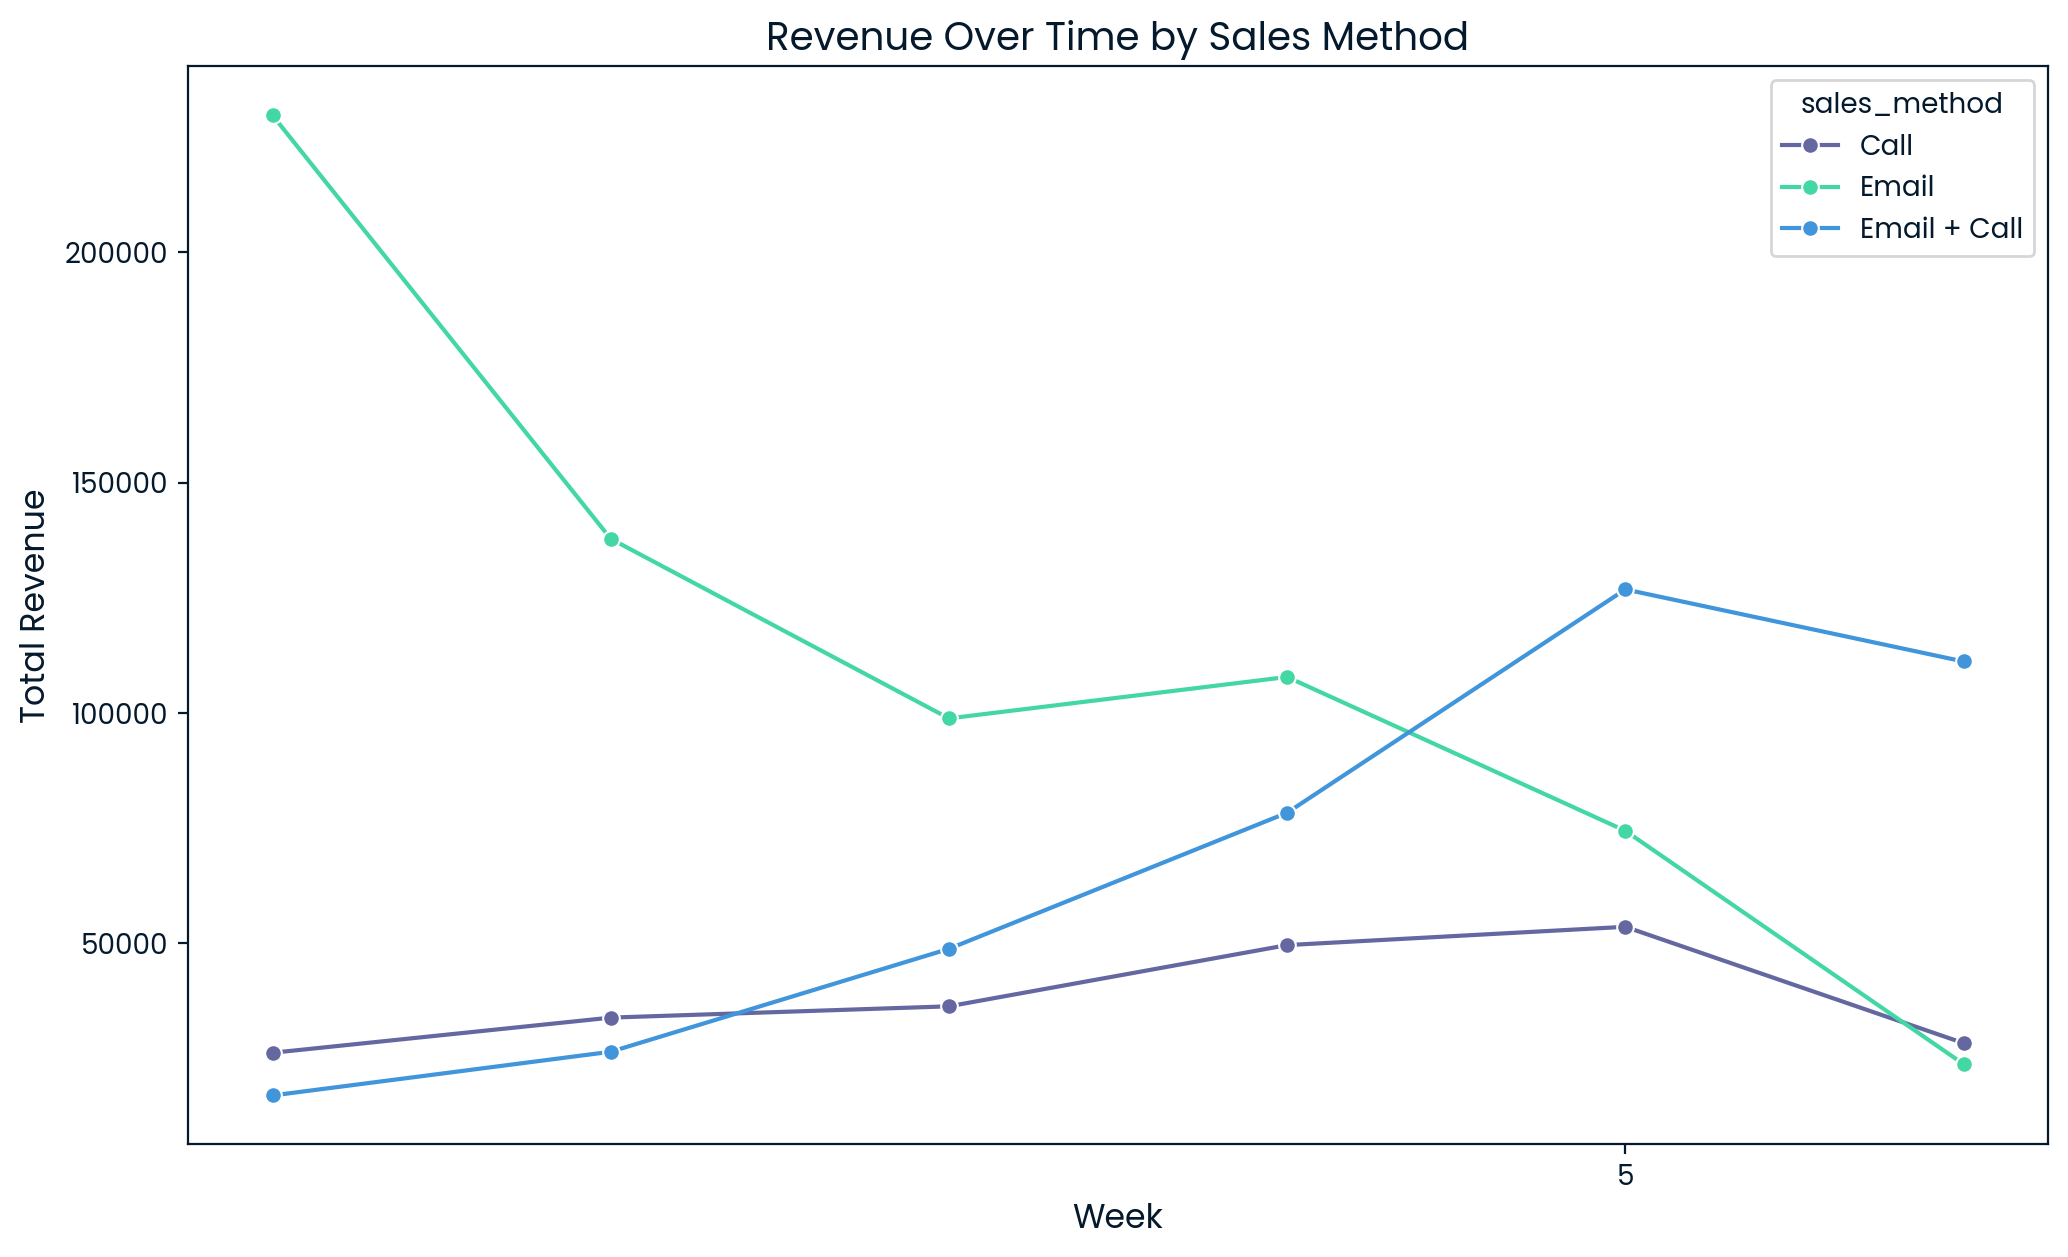

   sales_method   revenue
0          Call  0.067880
1         Email -0.316704
2  Email + Call  0.502498


In [189]:
# Grouping data by week and sales method to calculate total revenue per method per week
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Creating the line plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=revenue_over_time, x='week', y='revenue', hue='sales_method', marker='o')

# Adding labels and title
plt.title('Revenue Over Time by Sales Method', size=14)
plt.xlabel('Week', size=12)
plt.ylabel('Total Revenue', size=12)

# Setting x-axis ticks to show every week
plt.xticks(range(df['week'].min(), df['week'].max() + 1))

# Setting major locator to week
plt.gca().xaxis.set_major_locator(WeekdayLocator())

# Display the plot
plt.show()

# Metric definition: Average Weekly Revenue Growth per Sales Method
# Calculating the average weekly revenue growth per sales method
average_weekly_growth = revenue_over_time.groupby('sales_method')['revenue'].pct_change().groupby(revenue_over_time['sales_method']).mean().reset_index()

# Displaying the average weekly growth
print(average_weekly_growth)

This metric is designed to monitor the week-over-week growth efficiency of each sales method.

Initial Values for the Metric: Call: Average weekly growth of approximately 6.79%. Email: Average weekly decline of approximately 31.67%. Email + Call: Average weekly growth of approximately 50.25%. These values suggest that the "Email + Call" method is currently the most successful in terms of weekly revenue growth, whereas the "Email" method shows a decline. Monitoring these trends is crucial for making informed decisions on sales strategies

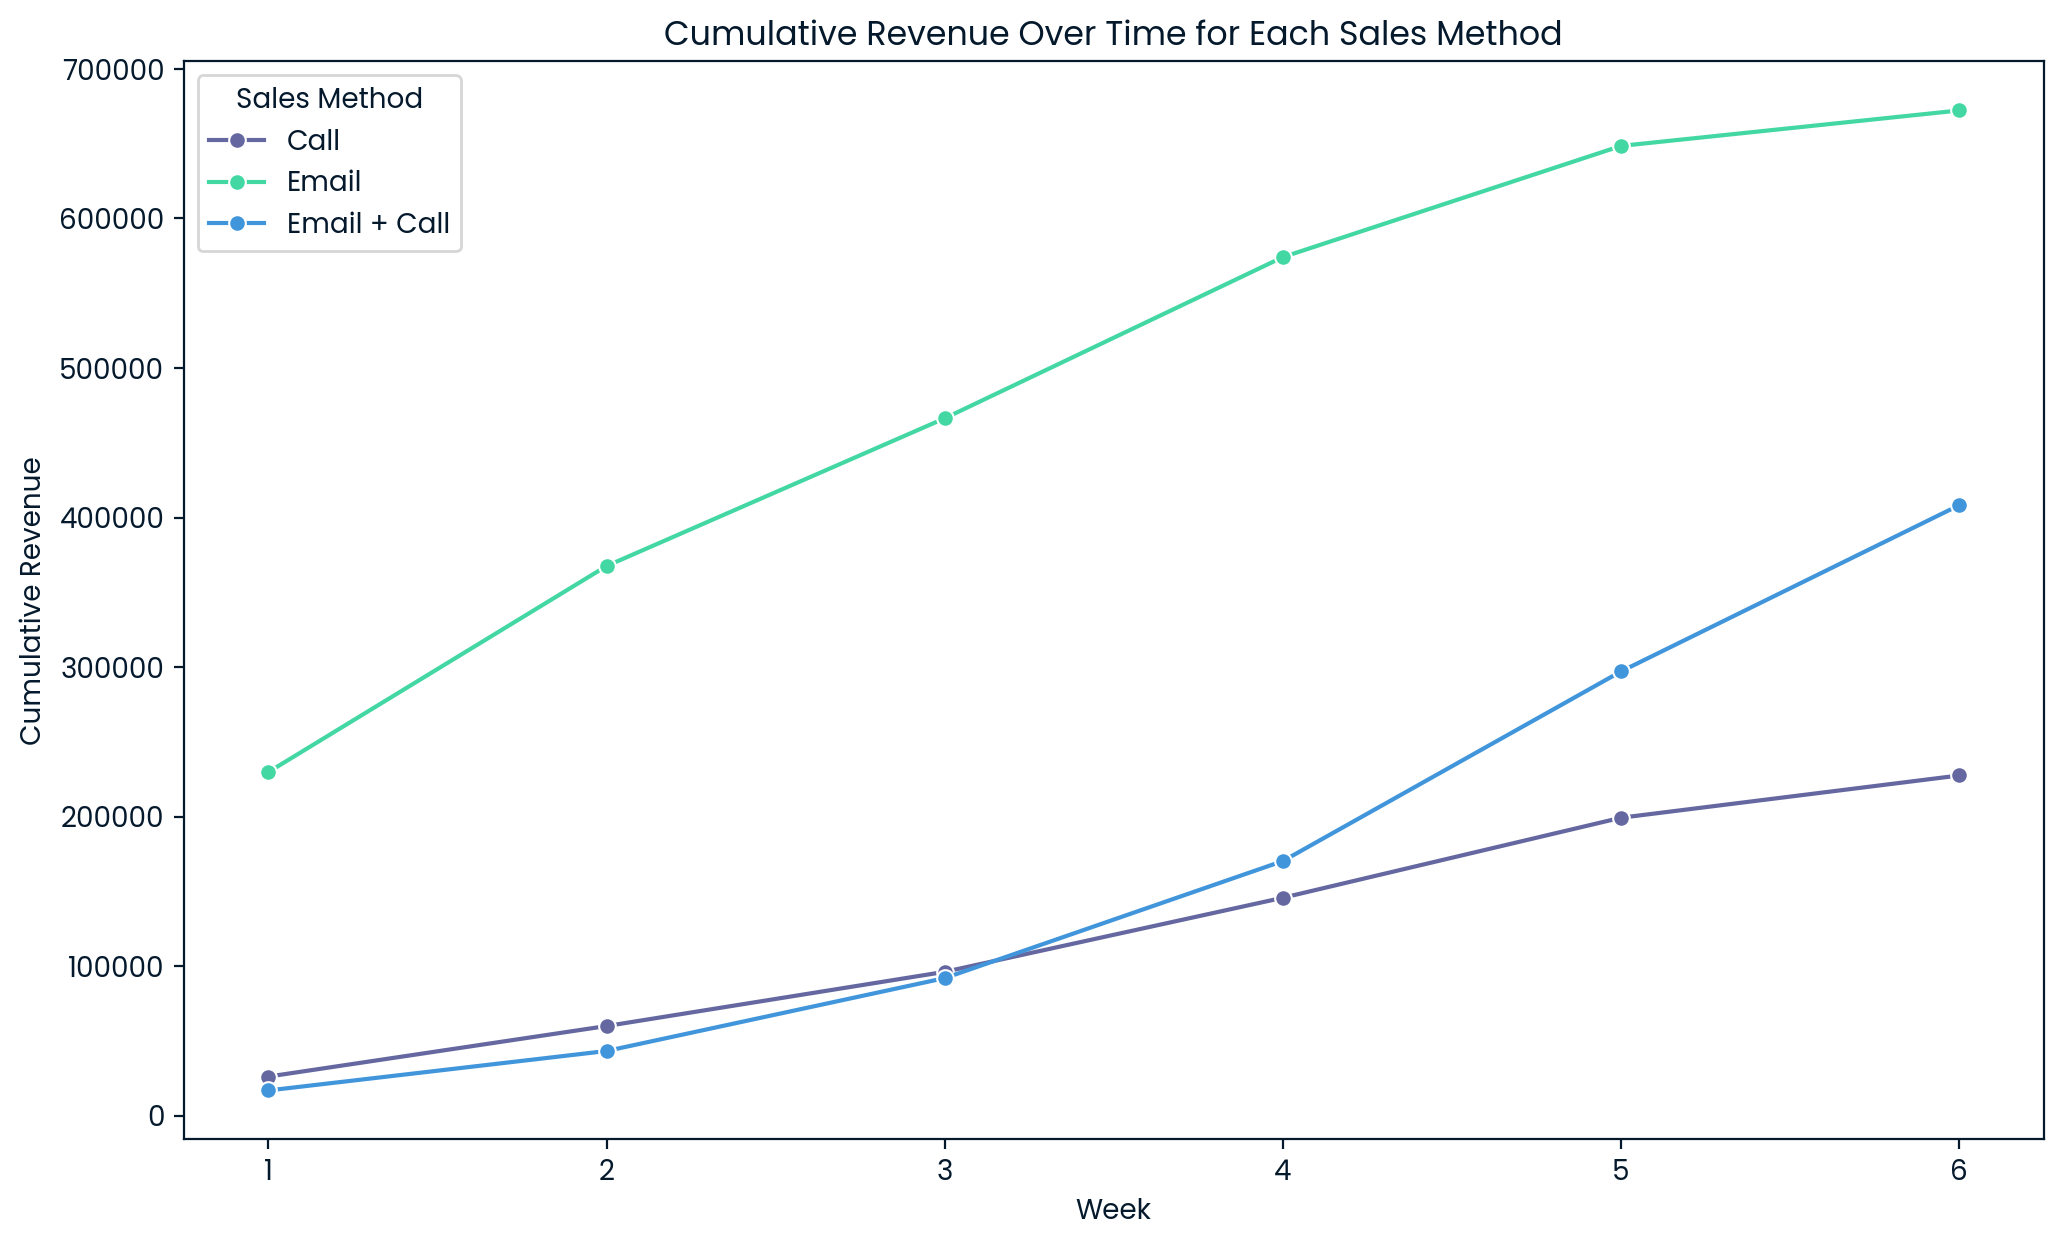

In [190]:
# Preparing data for the cumulative line chart
cumulative_revenue_line = revenue_over_time.copy()
cumulative_revenue_line['cumulative_revenue'] = cumulative_revenue_line.groupby('sales_method')['revenue'].cumsum()

# Creating the cumulative line chart
plt.figure(figsize=(12, 7))
sns.lineplot(data=cumulative_revenue_line, x='week', y='cumulative_revenue', hue='sales_method', marker='o')
plt.title('Cumulative Revenue Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Cumulative Revenue')
plt.legend(title='Sales Method')
plt.show()

Email Method: Started week 1 just above 200,000, displaying a robust growth trajectory to close week 6 just shy of 700,000. This indicates a strong market presence and a high rate of customer acquisition or upselling through email outreach.

Call Method: Commenced week 1 with a modest beginning, indicative of slower initial sales, and concluded week 6 slightly above 200,000. This slower growth suggests that while effective, the call method may require more time to convert sales or may serve a niche segment.

Email + Call Method: Initiated week 1 with numbers not as strong as the email-only method but showed a steady increase to finish week 6 slightly over 400,000. This demonstrates the combined strategy's ability to capture significant market share, possibly pointing to the added value of personalized follow-ups.

## **4. Based on the data, which method would you recommend we continue to use?**

In [191]:
# Total Revenue Generated by Each Method
total_revenue_by_method = df.groupby('sales_method')['revenue'].sum()

# Assuming the following effort scores (as previously defined):
effort_scores = {'Email': 1, 'Call': 2, 'Email + Call': 3}

# Calculating SEI for each sales method
sei = total_revenue_by_method / total_revenue_by_method.index.map(effort_scores)

# Preparing a DataFrame for easier analysis
analysis_df = pd.DataFrame({'Total Revenue': total_revenue_by_method, 'SEI': sei})
analysis_df.reset_index(inplace=True)

analysis_df

,sales_method,Total Revenue,SEI
0,Call,227513.02,113756.510000
1,Email,672220.61,672220.610000
2,Email + Call,408256.69,136085.563333


Based on the analysis, here are the key metrics for each sales method:

**Call**

Total Revenue: $227,513.02 SEI (Sales Efficiency Index): 113,756.51 

**Email**

Total Revenue: $672,220.61 SEI: 672,220.61 

**Email + Call**

Total Revenue: $408,256.69 SEI: 136,085.56 

Email: Despite its lower total revenue compared to "Email + Call", the Email method has the highest SEI, indicating it is the most efficient in terms of revenue generated per unit of effort. If the goal is to maximize efficiency (revenue per effort), then the Email method is recommended.

Email + Call: This method has the second-highest SEI and a significant total revenue, indicating it's also an effective method but requires more effort compared to Email alone.

Call: This method has the lowest SEI and total revenue among the three. It may not be the most efficient method in terms of the effort required.

Considering these insights, if the primary goal is to maximize efficiency, the Email method is recommended. However, if the focus is also on balancing total revenue with efficiency, a combined approach of Email + Call could be beneficial, especially for high-value sales or key customers.
The final decision should also factor in other elements such as customer preferences, the nature of products or services sold, and the capacity of the sales team to manage different methods effectively.

Proposed Metric: Sales Efficiency Index (SEI) 

Definition: The Sales Efficiency Index (SEI) is a metric designed to measure the effectiveness of each sales method in terms of revenue generated per unit of effort or resource invested.

## **5. Business Metric to Monitor**

**Adjusted Sales Efficiency Index (ASEI)** 

Definition: ASEI measures the efficiency of each sales method in generating revenue, adjusted for the estimated effort.

In [192]:
# Counting the number of transactions for each sales method
transactions_by_method = df.groupby('sales_method').size()

# Calculating Adjusted SEI (ASEI) for each sales method
asei = total_revenue_by_method / (transactions_by_method * total_revenue_by_method.index.map(effort_scores))

# Preparing the DataFrame for ASEI
asei_df = pd.DataFrame({'Total Revenue': total_revenue_by_method, 'Transactions': transactions_by_method, 'ASEI': asei})
asei_df.reset_index(inplace=True)

asei_df

,sales_method,Total Revenue,Transactions,ASEI
0,Call,227513.02,4780,23.798433
1,Email,672220.61,6921,97.127671
2,Email + Call,408256.69,2223,61.217078


### **Analysis and Business Metric Recommendation**

The Email method has the highest ASEI, indicating it's the most efficient in terms of revenue per transaction and effort. This method balances a high total revenue with a large number of transactions effectively. The Email + Call method, while effective in total revenue, shows a moderate level of efficiency when adjusted for the number of transactions and estimated effort. The Call method has the lowest ASEI, suggesting it's less efficient compared to the other methods.

## **6. Final Summary & Recommendations**

Based on the analysis above, I want to share a few key recommendations that could help to optimize business performance.

- First, I recommend the company increases the focus on the 'Email + Call' method because of the success it displayed in total average revenue generated per sale ($183 USD/sale) as well as the fact that it showed a consistent increase across most weeks, only decreasing slightly between weeks 2 and 3. This approach showed significantly higher results than the other approaches. It also only included phone time on average of 10 minutes per customer, much lower than the 'call' only approach.

- Next, because Email also displayed somewhat positive results that trended upwards across the 6 week period, I would suggest the company conveys stronger value in messages with more targeted emails into their strategy as this could be a way to add some extra revenue to the pipeline with little to no extra effort and a light lift on their end.

- I would recommend the team to regularly track the Adjusted Sales Efficiency Index (ASEI) to assess the ongoing efficiency of each sales method as this can be measured over time, allowing trends to appear and be analyzed to predict future outcomes. Specifically, I would suggest they drill down on the two most successful approaches ('Email' and 'Email + Call') Once implemented for a certain period of time, this could be a way for the company to decide if they should quickly pivot when results or future forecasts are not falling in line with their revenue goals, this metric helps to make informed decisions on resource allocation and strategy adjustments.

- I would suggest that the team decreases the focus on the 'Call' method because it showed poor results that were significantly lower than the other approaches, on a week over week basis. In addition its a time intensive approach that didn't seem to be worth the extra effort and time that was required (30 min phone time per customer). The team should really be focusing on the other two approaches to truly optimize performance, and this will likely lead to increased total revenue. OR Reevaluate the Call Method, given its lower efficiency and revenue generation, consider reevaluating or optimizing the "Call" method. This might involve training, script adjustments, or integrating technology to enhance effectiveness.

- Improve Data Collection practices - There were 1074 missing values in the revenue column and this missing information could be the difference between achieving their goals or falling short. I dropped all rows that had missing revenue amounts because I felt that would be the best way to account for these missing values.
There were also some values in the years as customer column that would be considered outliers, they had values that were higher than 39 (total number of years the company has been around), including values of 47 and 63, which simply did not fit in the dataset so I dropped them too. Going forward I would suggest the team ensures that this information is correct and doesn't include bad data like this.

To summarize, I feel that this company should use a multi channel approach to reach their sales goals. Email + Call showed a significantly higher return on time invested and this information could help the company optimize operations to increase performance and revenue generation. I also think a follow up call a day or two after the product information email could go a long way in converting sales. Given my experience in sales, waiting a week or so to make a call often leads to less pick ups or people not remembering the email. It's important to be prompt and try to get timing on your side for these kinds of things. With the right efforts and focus in the proven approaches, the team can rise above the competition and break through the noise!

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation